# Exploratory data analysis of 2007-2008 Financial crisis data 

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline


In [17]:
# Defining the start and end date for stock data collection
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [20]:
# Extracting stock information for Bank of America, and displaying a few records
BAC = data.DataReader("BAC", 'google', start, end)
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


In [3]:
# CitiGroup
C = data.DataReader("C", 'google', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'google', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'google', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'google', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'google', start, end)

In [21]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)

In [22]:
# Creating tickers as string
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [35]:
# Creating a single dataframe with tickers as key
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)#, names=['Bank Ticker','Stock Info'])

bank_stocks.head(3)

BAC                                     C                       \
             Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                           
2006-01-03  46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04  47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05  46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   

                       ...        MS                                 WFC  \
             Volume    ...      Open   High    Low  Close   Volume  Open   
Date                   ...                                                 
2006-01-03  1537660    ...     57.17  58.49  56.74  58.31  5377000  31.6   
2006-01-04  1871020    ...     58.70  59.28  58.35  58.35  7977800  31.8   
2006-01-05  1143160    ...     58.55  58.59  58.02  58.51  5778000  31.5   

                                           
             High    Low  Close    Volume  
Date                                       
2006-01-03  31.98  31.20  31.90  11016400  
2006-01-04  31.82  31.36  31.53  10871000  
2006-01-05  31.56  31.31  31.50  10158000  

[3 rows x 30 columns]

In [38]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head(3)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   

Bank Ticker             ...        MS                                 WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume  Open   
Date                    ...                                                 
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.6   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.8   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.5   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  

[3 rows x 30 columns]

In [41]:
# maximum closing stock price for each of the bank

bank_stocks.xs('Close', axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [42]:
# Creating a dataframe which contains returns for each banks stock
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()
    

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


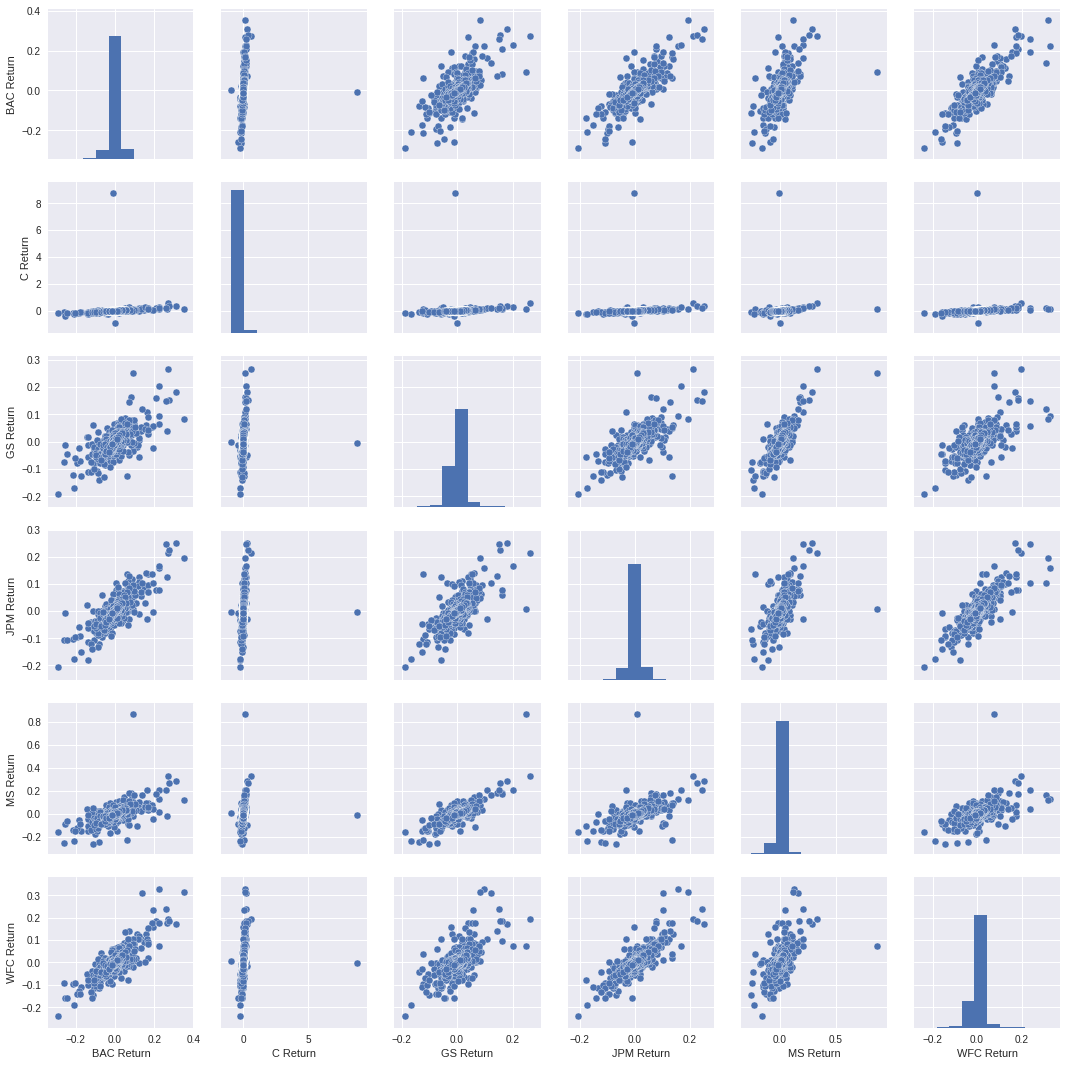

In [44]:
#pairplot of the 'returns' dataframe
import seaborn as sns
sns.pairplot(returns[1:])

In [ ]:
# In above pairplot, citi group stands out and shows great losses.

In [46]:
# dates for each bank's worst single day returns
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [48]:
# # dates for each bank's best single day returns
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [50]:
# standard deviation for returns of each of the bank for the entire period
returns.std()

# result shows that City Group has the riskiest stock

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [61]:
# standard deviation for returns of each of the bank for the year 2015
returns.loc['2015-01-01':'2015-12-31'].std()

# It is same as before, but this time MS and BAC are more riskier

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

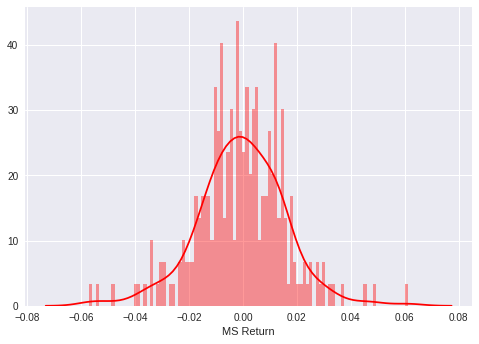

In [64]:
# Distribution of the MS returns in 2015
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='red',bins=100)

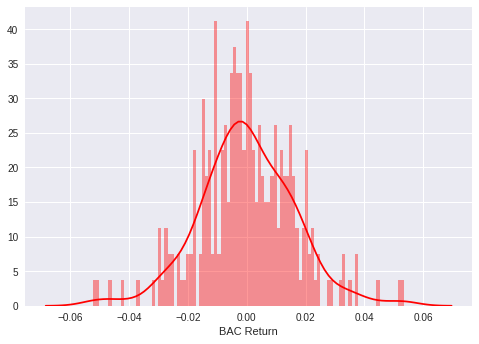

In [67]:
# Distribution of the  BAC returns in 2015
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['BAC Return'],color='red',bins=100)

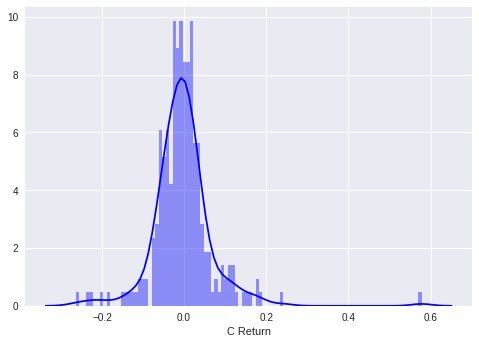

In [69]:
# Distribution of the  C returns in 2008
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='blue',bins=100)

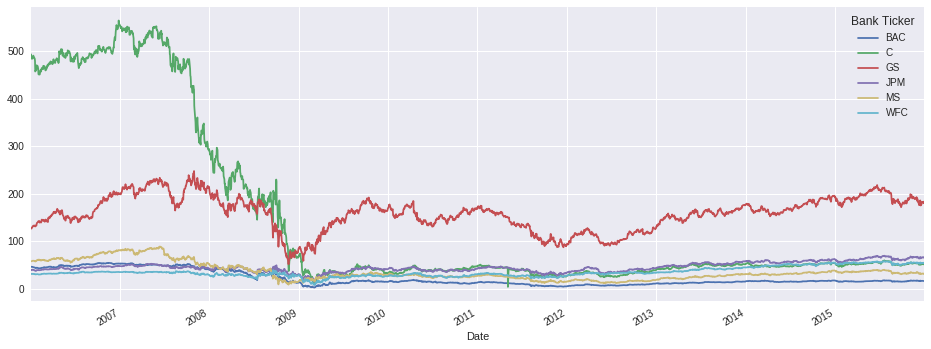

In [74]:
# CLosing price for each box for the entire perios
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(16,6))

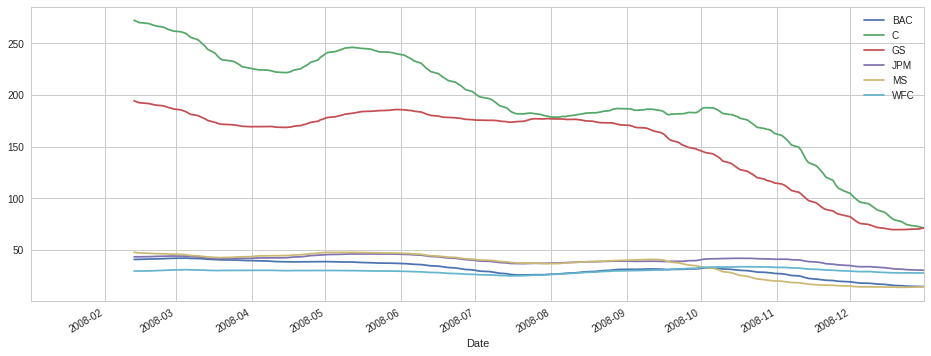

In [90]:
# calculating and ploting the 30 day rooling average of the closing stock prises of all of the banks, in year 2008
for tick in tickers:
    bank_stocks[tick]['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(figsize=(16,6),label=tick)
plt.legend()

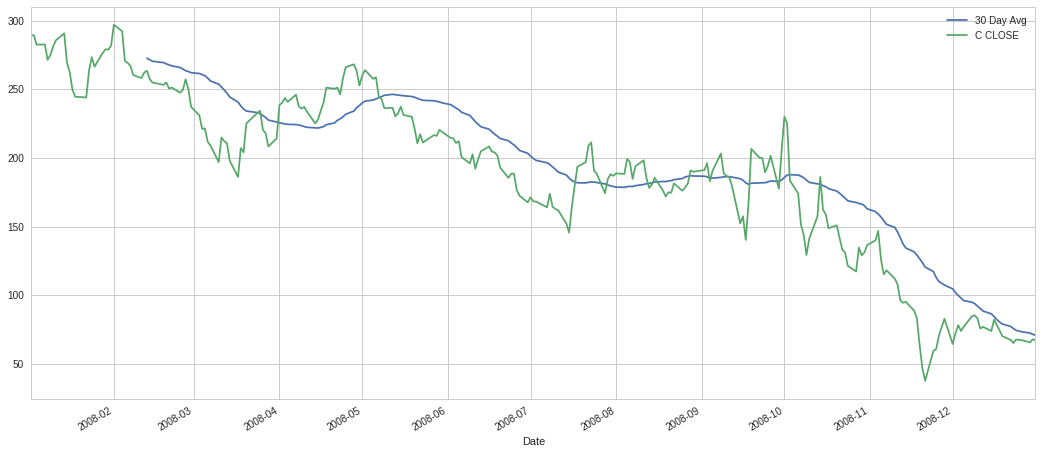

In [92]:
# plot the 30 day moving average vs closing stock price of the City Group in year 2008
plt.figure(figsize=(18,8))
C['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
C['Close'].loc['2008-01-01':'2009-01-01'].plot(label='C CLOSE')
plt.legend()


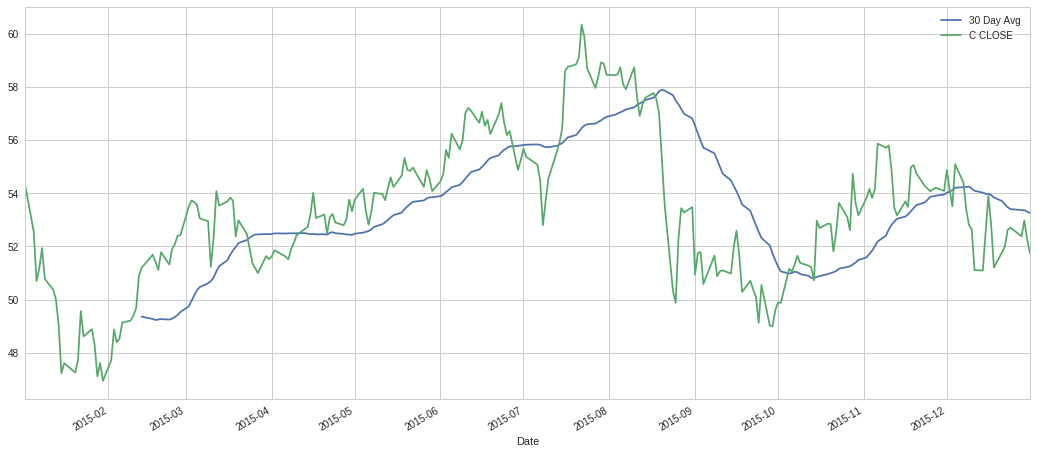

In [95]:
# plot the 30 day moving average vs closing stock price of the City Group in year 2008
plt.figure(figsize=(18,8))
C['Close'].loc['2015-01-01':'2015-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
C['Close'].loc['2015-01-01':'2015-12-31'].plot(label='C CLOSE')
plt.legend()